In [3]:
import un0usb as USB # neeeds `pip3 install un0usb` before

import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import datetime

import os,glob

In [4]:
FileView = USB.FView() # Opens a viewing object
folders = ["bk8536","brd35","duc2m"]
#F = ["bk8536"]

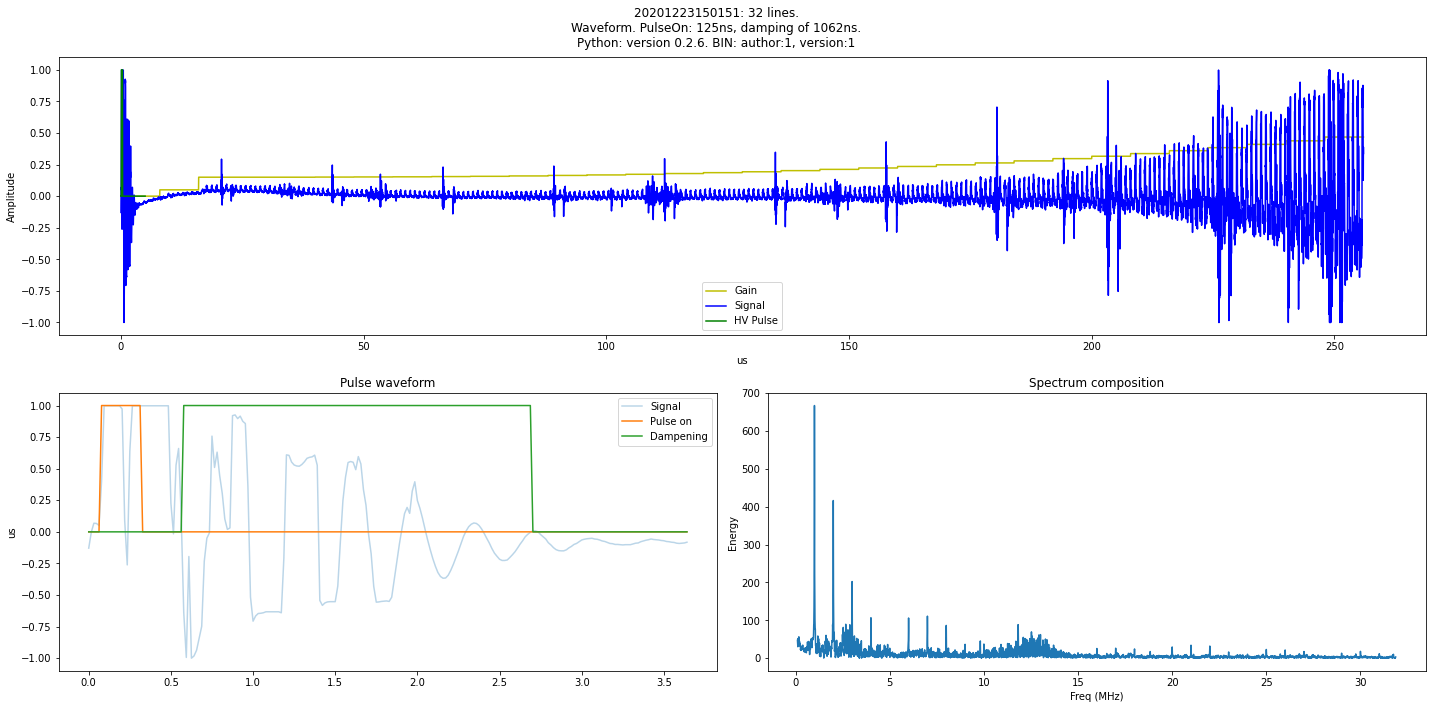

./bk8536/perpendiculaire.npz


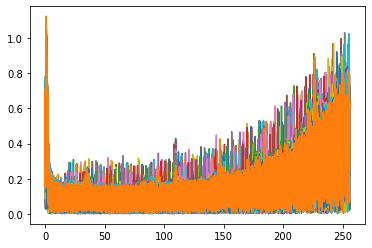

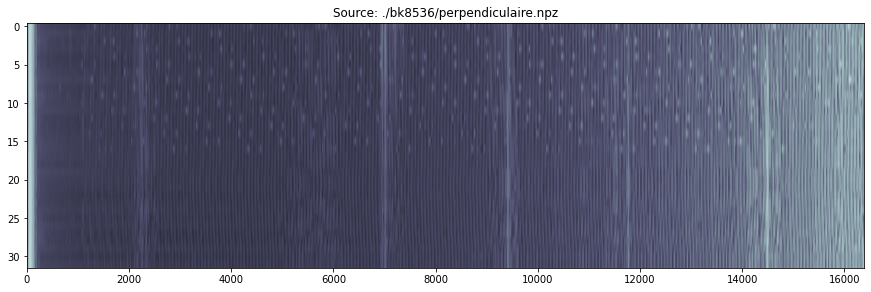

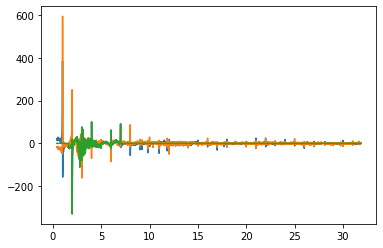

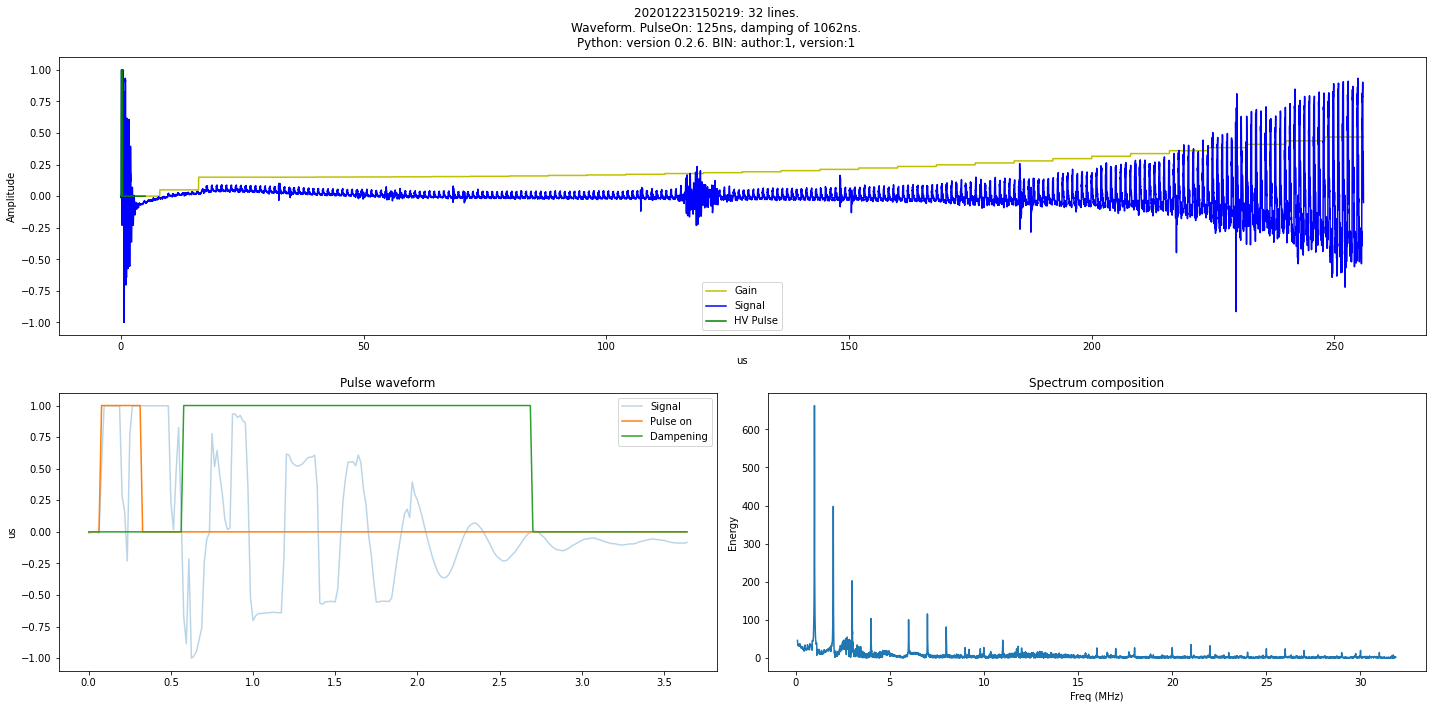

./bk8536/parallel.npz


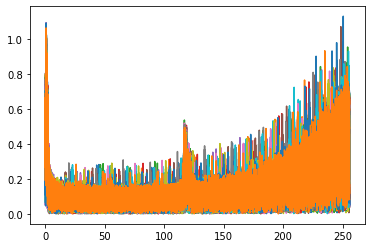

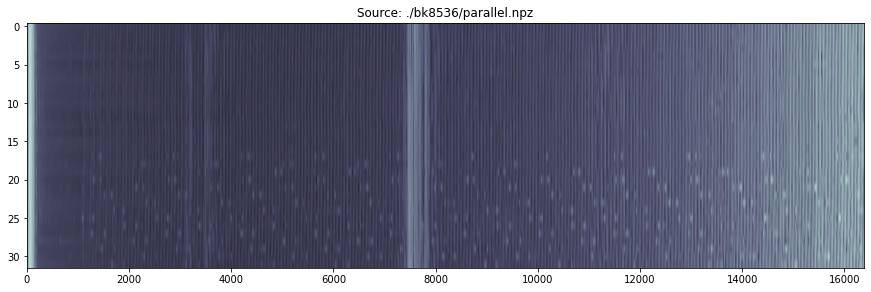

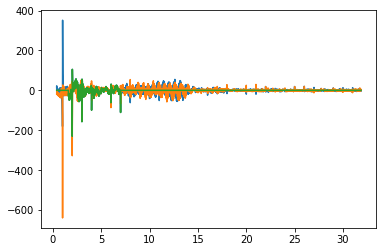

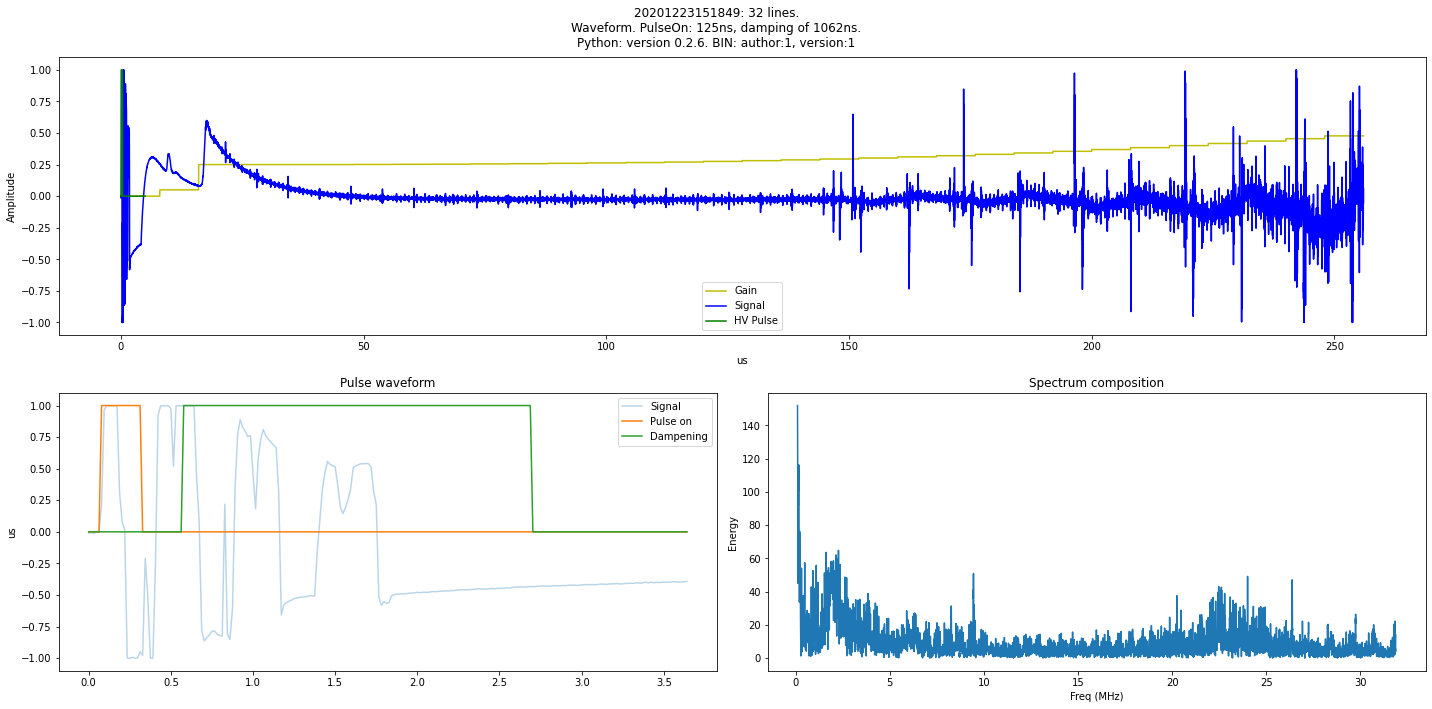

./brd35/20201223151849.npz


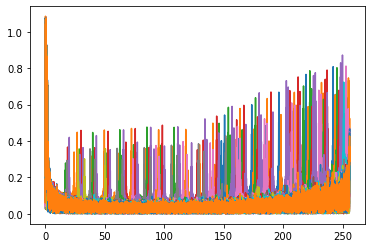

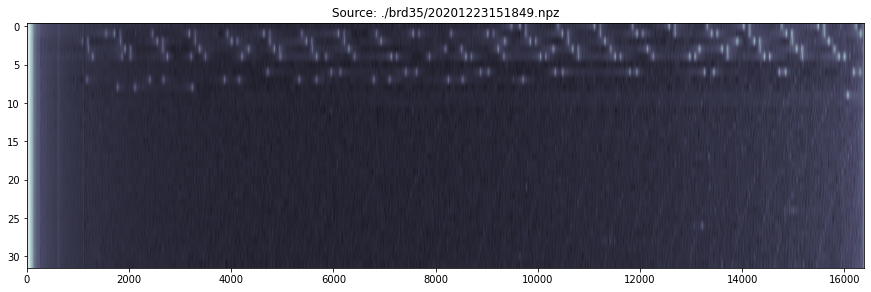

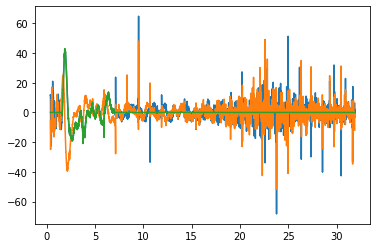

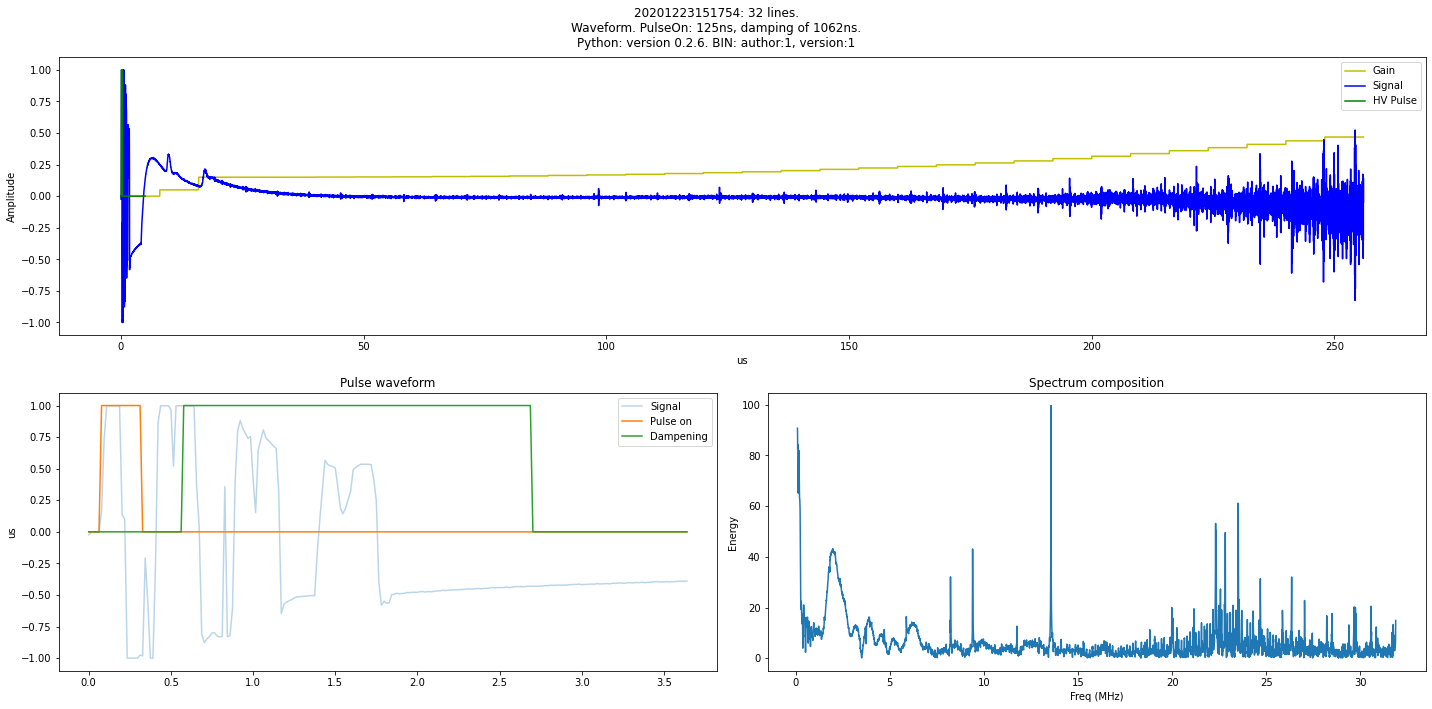

./brd35/20201223151754.npz


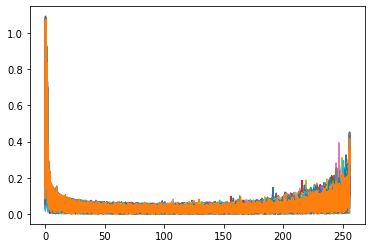

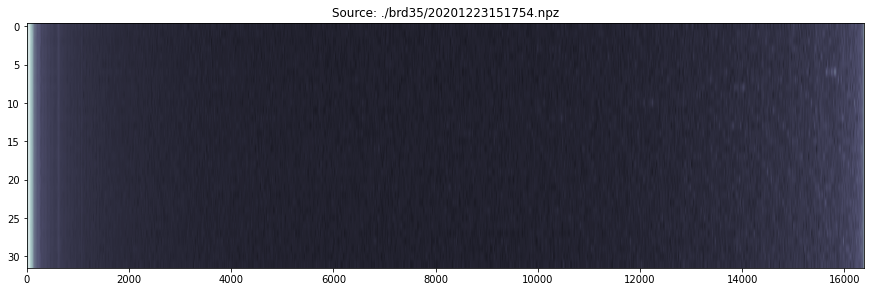

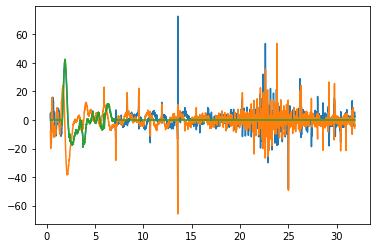

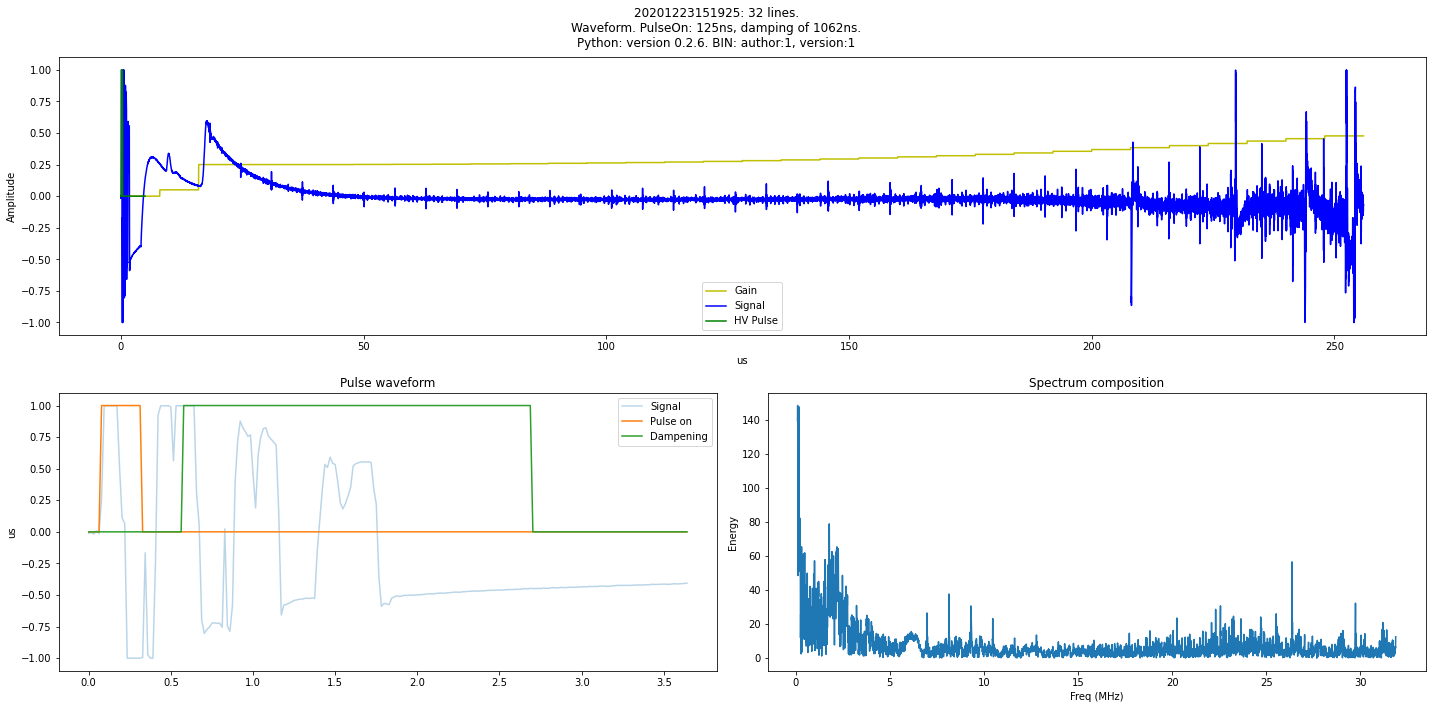

./brd35/20201223151925.npz


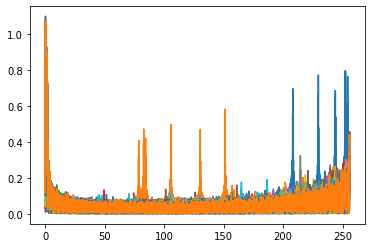

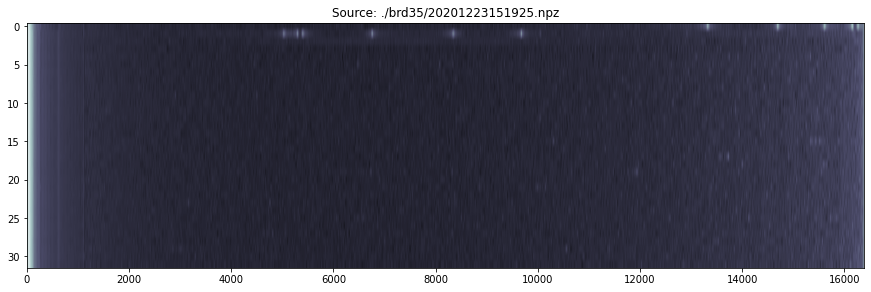

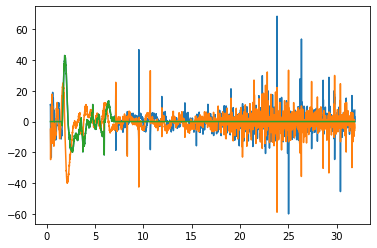

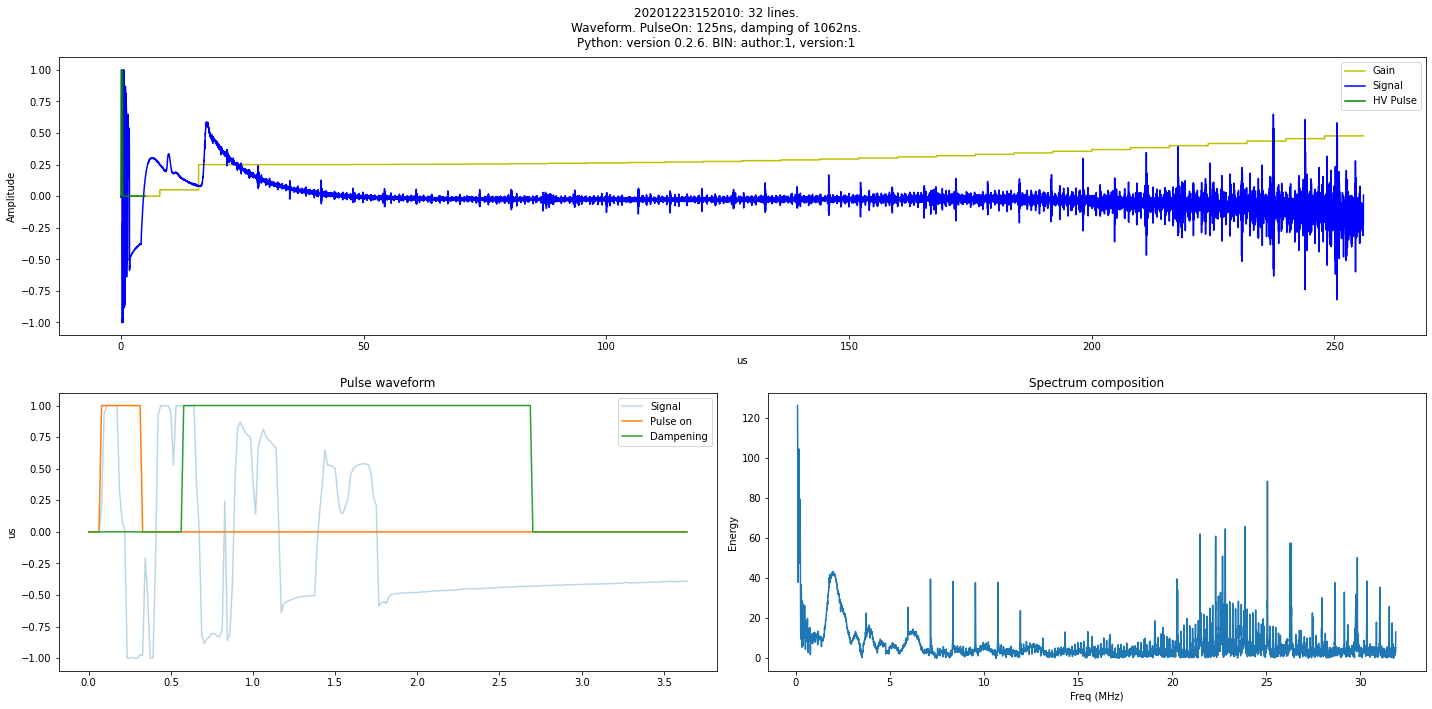

./brd35/20201223152010.npz


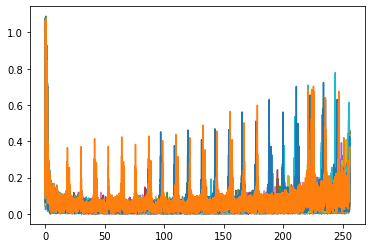

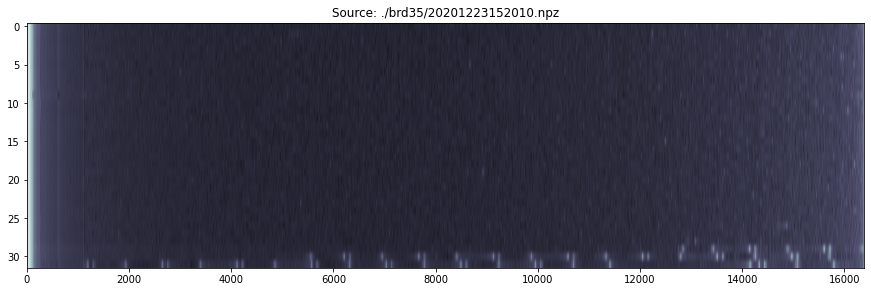

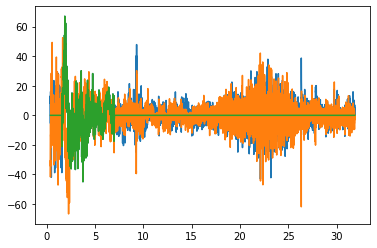

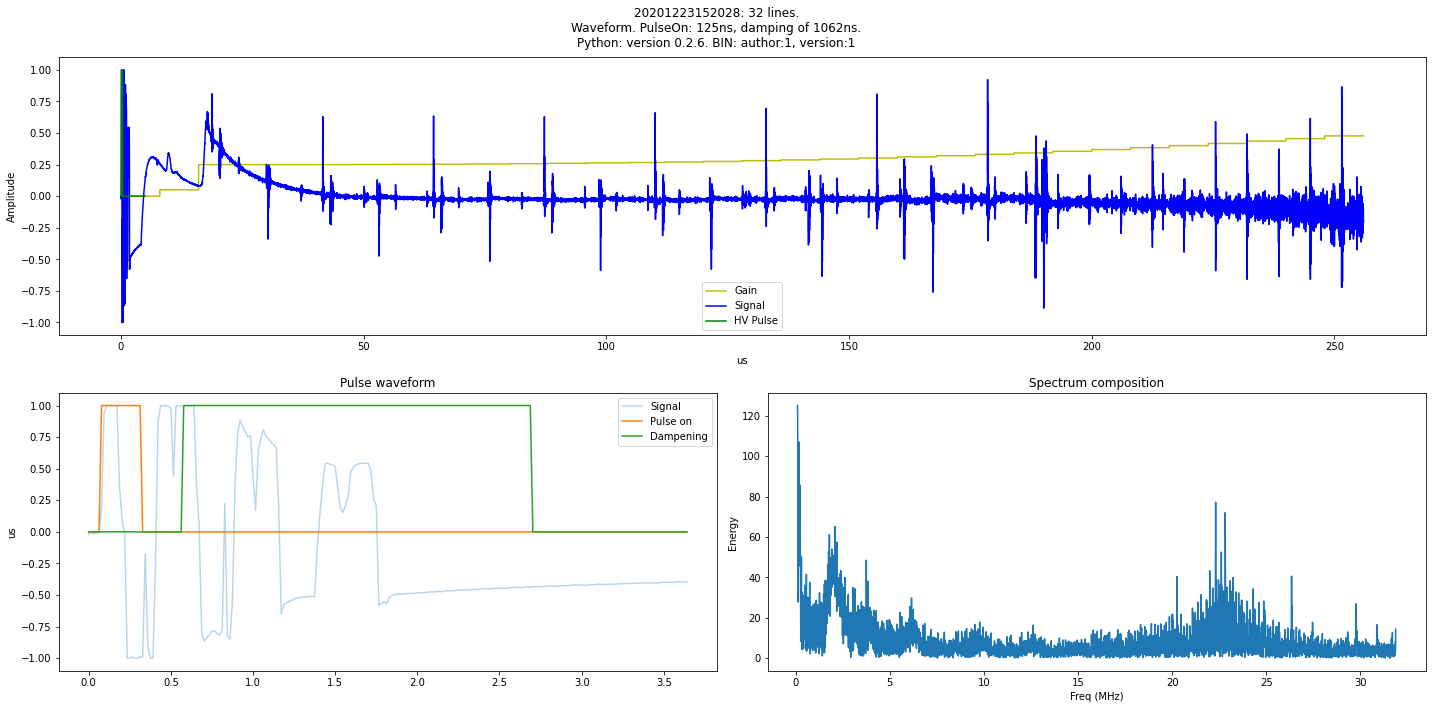

./brd35/20201223152028.npz


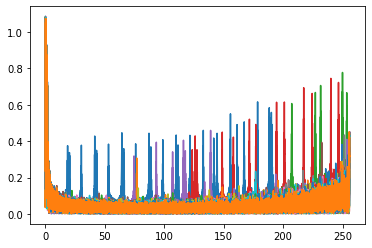

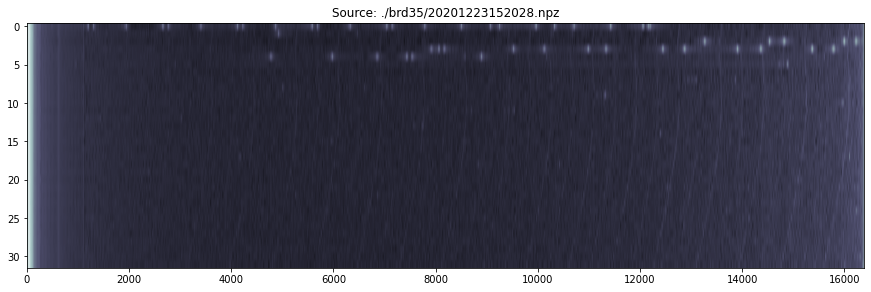

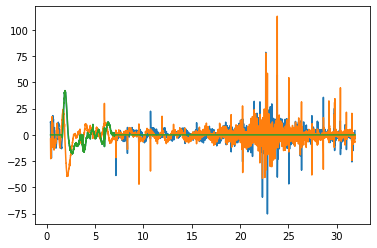

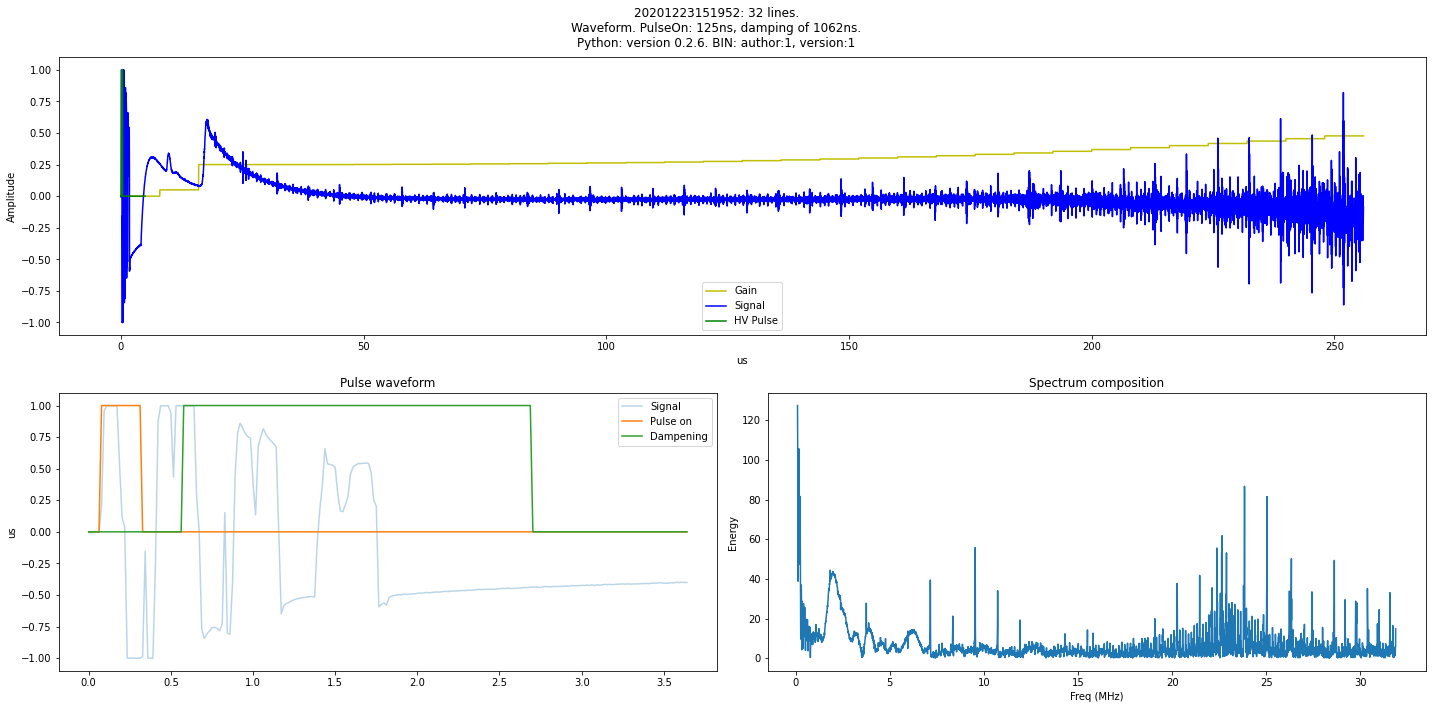

./brd35/20201223151952.npz


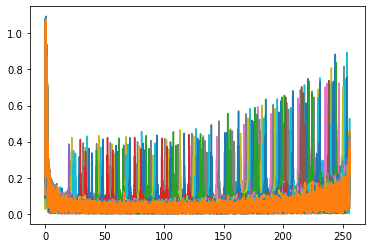

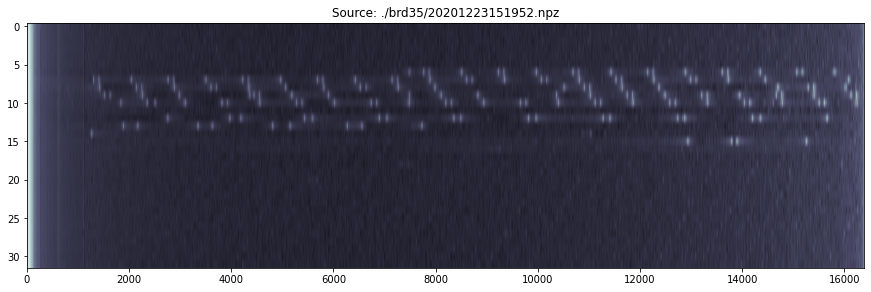

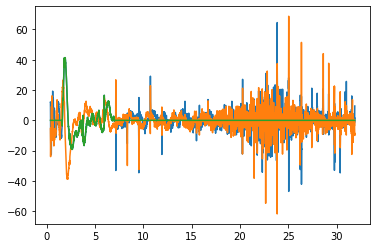

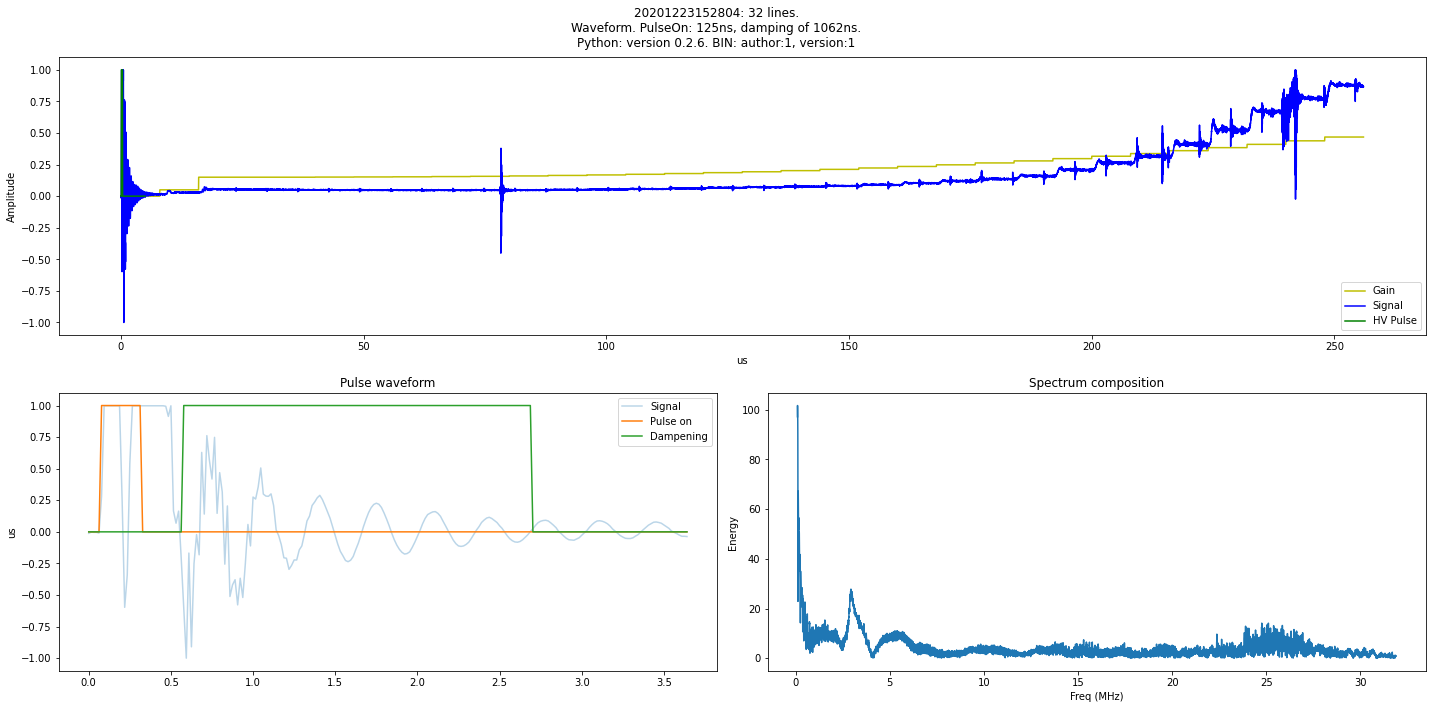

./duc2m/20201223152804.npz


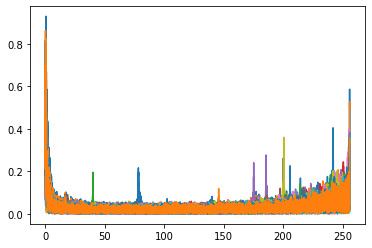

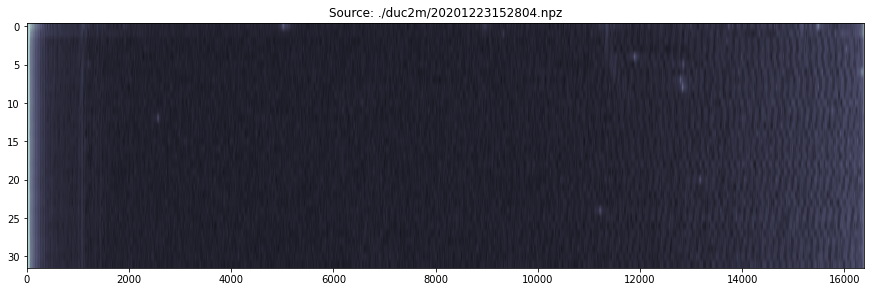

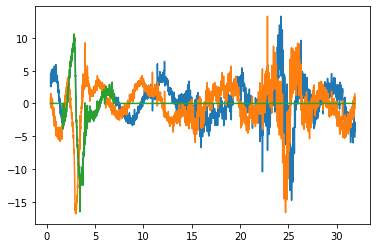

In [ ]:
for folder in folders: 
    for npz in glob.glob("./"+folder+"/*.npz"):
        acq = FileView.readfile(npz) # plots it
        print(npz)
        clean = []
        for i in range(len(acq["signal"])):
            ligne = acq["signal"][i]
            N = len(ligne)
            f = [k*63.75/N for k in range(N)]
            FFT = np.fft.fft(ligne)
            FFTfiltered = FFT.copy()
            for x in range(N//2+1):
                if (f[x] < 1.6) or (f[x] > 7):
                    FFTfiltered[x] = 0
                    FFTfiltered[-x] = 0
            ligne_filtered = np.real(np.fft.ifft(FFTfiltered))
            #plt.plot(f[100:N//2],FFT[100:N//2])
            #plt.plot(f[100:N//2],FFTfiltered[100:N//2])
            #plt.show()
            #plt.plot(acq["t"],ligne)
            #plt.plot(acq["t"],ligne_filtered)
            toplot = np.sqrt(np.abs(ligne_filtered))
            plt.plot(acq["t"],np.sqrt(np.abs(ligne_filtered)))
            clean.append(np.sqrt(np.sqrt(np.abs(ligne_filtered))))
        plt.figure(figsize=(15,5))
        plt.title("Source: "+npz)
        plt.imshow(clean,aspect=150,cmap="bone")
        plt.savefig(npz+".png")
        plt.figure()
        plt.plot(f[100:N//2],np.real(FFT[100:N//2]))
        plt.plot(f[100:N//2],np.imag(FFT[100:N//2]))
        plt.plot(f[100:N//2],np.real(FFTfiltered[100:N//2]))
        plt.show()